# Activity 12: Iris Classification using Logistic Regression (with Answers)

In this activity we will be using the well known Iris Species dataset [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set) created in 1936 by botanist Ronald Fisher.  The dataset contains Sepal and Petal Length and Width measurements of three different Iris flower species *Iris setosa*, *Iris versicolor*, *Iris virginica*.  Throughout this activity we will use the measurements provided in the dataset to classify the different flower species.

## Import the Required Packages
For this exercise we will require the Pandas package for loading the data, the matplotlib package for plotting as well as scitkit-learn for creating the Logistic Regression model.  Import all of the required packages and relevant modules for these tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Load the Data
Load the Iris dataset using Pandas and examine the first 5 rows

In [2]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Engineering
We need to select the most appropriate features that will provide the most powerful classification model.  Plot a number of different features vs the allocated species classifications e.g. Sepal Length vs Petal length and Species.  Visually inspect the plots and look for any patterns that could indicate separation between each of the species.

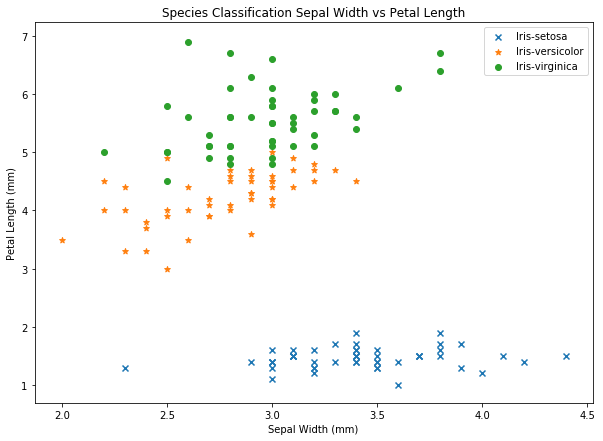

In [9]:
markers = {
    'Iris-setosa': {'marker': 'x'},
    'Iris-versicolor': {'marker': '*'},
    'Iris-virginica': {'marker': 'o'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('Species'):
    plt.scatter(group['Sepal Width'], group['Petal Length'], 
                label=name,
                marker=markers[name]['marker'],
               )
    
plt.title('Species Classification Sepal Width vs Petal Length');
plt.xlabel('Sepal Width (mm)');
plt.ylabel('Petal Length (mm)');
plt.legend();


Select the features by writing the column names in the list below:

In [4]:
selected_features = [
    'Sepal Width', # List features here
    'Petal Length'
]

## Constructing the Logistic Regression Model
Before we can construct the model we must first convert the species values into labels that can be used within the model.  Replace:

1. The species string *Iris-setosa* with the value 0
2. The species string *Iris-versicolor* with the value 1
3. The species string *Iris-virginica* with the value 2

In [5]:
species = [
    'Iris-setosa', # 0
    'Iris-versicolor', # 1
    'Iris-virginica', # 2
]
output = [species.index(spec) for spec in df.Species]

Create the model using the *selected_features* and the assigned *species* labels

In [6]:
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(df[selected_features], output)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Compute the accuracy of the model against the training set:

In [7]:
model.score(df[selected_features], output)

0.9533333333333334

Construct another model using your second choice *selected_features* and compare the performance:

In [10]:
selected_features = [
    'Sepal Length', # List features here
    'Petal Width'
]
model.fit(df[selected_features], output)
model.score(df[selected_features], output)

0.96

Construct another model using all available information and compare the performance:

In [11]:
selected_features = [
    'Sepal Length', # List features here
    'Sepal Width'
]
model.fit(df[selected_features], output)
model.score(df[selected_features], output)

0.82